In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import plotly.express as px
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# Load the dataset

In [5]:
df = pd.read_csv(r'D:\python\machine algorithms\titanic_dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA and preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.drop(['PassengerId','Name'],axis=1,inplace= True)

In [11]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
df.drop('Cabin',axis= 1,inplace=True)

In [8]:
df.dropna(axis= 0,inplace =True)


In [9]:
df[df['Fare']==0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
179,0,3,male,36.0,0,0,LINE,0.0,S
263,0,1,male,40.0,0,0,112059,0.0,S
271,1,3,male,25.0,0,0,LINE,0.0,S
302,0,3,male,19.0,0,0,LINE,0.0,S
597,0,3,male,49.0,0,0,LINE,0.0,S
806,0,1,male,39.0,0,0,112050,0.0,S
822,0,1,male,38.0,0,0,19972,0.0,S


In [10]:
df.drop([179,263,271,302,597,806,822],axis=0,inplace=True)

In [26]:
df.duplicated().sum()

3

In [11]:
df.drop_duplicates(inplace =True)

In [12]:
df.drop('Embarked',axis=1,inplace=True)

In [32]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,male,22.0,1,0,A/5 21171,7.2500
1,1,1,female,38.0,1,0,PC 17599,71.2833
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250
3,1,1,female,35.0,1,0,113803,53.1000
4,0,3,male,35.0,0,0,373450,8.0500


In [13]:
df.replace({'Sex':{'male':0,
                    'female':1}},inplace =True)

In [14]:
df.drop('Ticket',axis =1,inplace =True)

In [39]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [30]:
categorical_cols = ['Survived','Pclass','Sex','SibSp','Parch']
numerical_cols = ['Age','Fare']


In [31]:
for col in df[categorical_cols]:
    print(df[col].value_counts())

0    418
1    284
Name: Survived, dtype: int64
3    349
1    180
2    173
Name: Pclass, dtype: int64
0    445
1    257
Name: Sex, dtype: int64
0    460
1    183
2     24
4     18
3     12
5      5
Name: SibSp, dtype: int64
0    510
1    109
2     68
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [17]:
fig = px.imshow(df.corr(),text_auto=True,width=800,height=600)
fig.show()

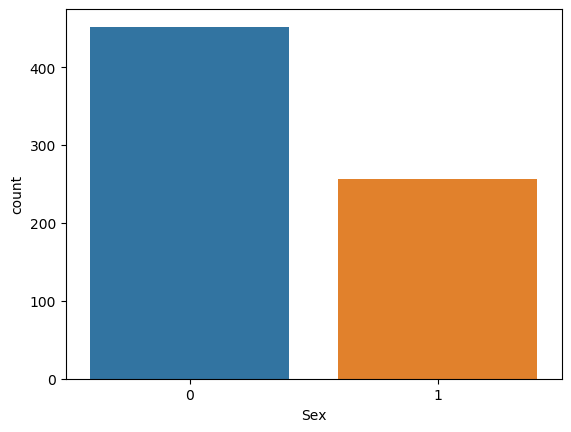

In [56]:
sns.countplot(df,x='Sex')

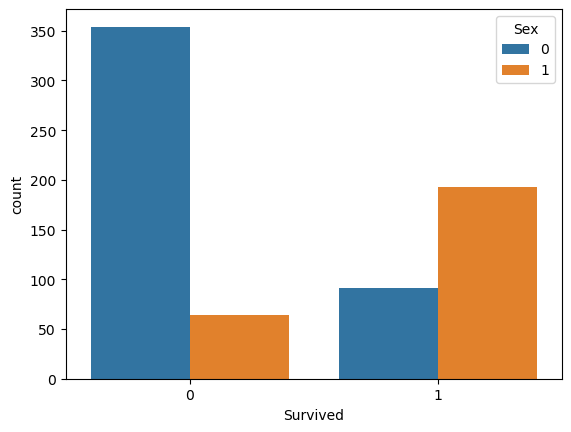

In [18]:
sns.countplot(df,x='Survived',hue='Sex')

In [18]:
px.histogram(df,x='Age',color='Survived')

In [24]:
px.box(df,x='Age',color='Survived')

c:\Users\compustore\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\compustore\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\Users\compustore\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


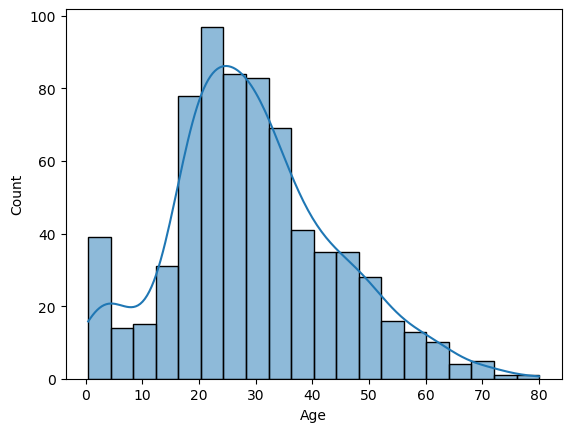

In [56]:
sns.histplot(df,x=df['Age'],kde=True)

In [34]:
for col in categorical_cols:
    print(df.groupby('Survived')[col].value_counts())

Survived  Survived
0         0           418
1         1           284
Name: Survived, dtype: int64
Survived  Pclass
0         3         267
          2          90
          1          61
1         1         119
          2          83
          3          82
Name: Pclass, dtype: int64
Survived  Sex
0         0      354
          1       64
1         1      193
          0       91
Name: Sex, dtype: int64
Survived  SibSp
0         0        290
          1         86
          4         15
          2         14
          3          8
          5          5
1         0        170
          1         97
          2         10
          3          4
          4          3
Name: SibSp, dtype: int64
Survived  Parch
0         0        329
          1         49
          2         29
          4          4
          5          4
          3          2
          6          1
1         0        181
          1         60
          2         39
          3          3
          5          1
Nam

In [59]:
df.groupby('Survived')['Age'].mean()

Survived
0.0    30.537081
1.0    28.227473
Name: Age, dtype: float64

In [32]:
df.groupby('Survived')['Fare'].mean()

Survived
0    23.295104
1    51.864350
Name: Fare, dtype: float64

In [39]:
df.drop('SibSp',axis= 1,inplace=True)

In [69]:
df

,Survived,Pclass,Sex,Age,Parch,Fare
0,0,3,0,22.0,0,7.2500
1,1,1,1,38.0,0,71.2833
2,1,3,1,26.0,0,7.9250
3,1,1,1,35.0,0,53.1000
4,0,3,0,35.0,0,8.0500
...,...,...,...,...,...,...
885,0,3,1,39.0,5,29.1250
886,0,2,0,27.0,0,13.0000
887,1,1,1,19.0,0,30.0000
889,1,1,0,26.0,0,30.0000


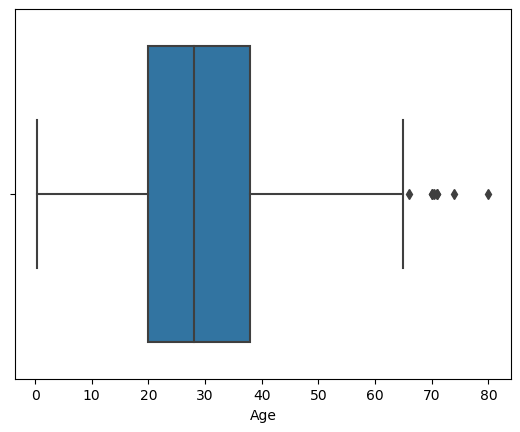

In [73]:
sns.boxplot(df,x='Age')

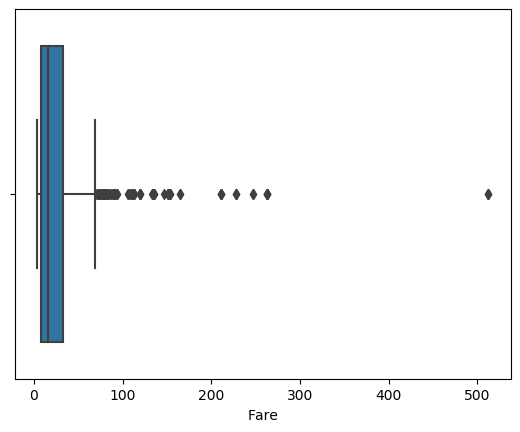

In [67]:
sns.boxplot(df,x='Fare')

In [87]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

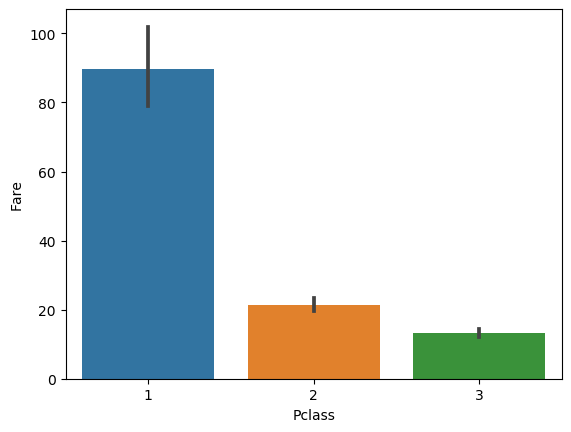

In [37]:
sns.barplot(df,x='Pclass',y='Fare')

c:\Users\compustore\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

c:\Users\compustore\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

c:\Users\compustore\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



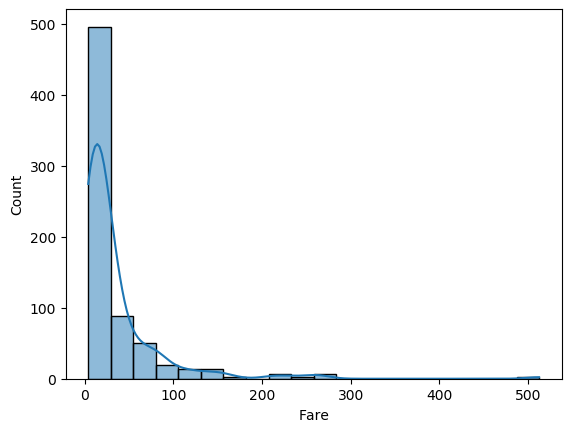

In [69]:
sns.histplot(df,x='Fare',bins=20,kde=True)

In [51]:
px.box(df,x=np.log(df['Fare']))

In [12]:
df['Fare']=np.log(df['Fare'])

c:\Users\compustore\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

c:\Users\compustore\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

c:\Users\compustore\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



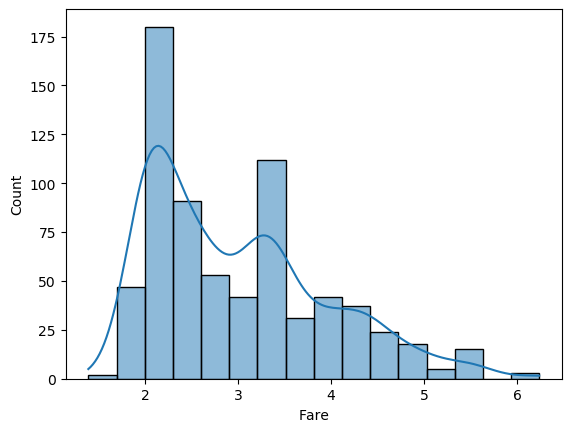

In [104]:
sns.histplot(df,x=df['Fare'],kde=True)

In [106]:
px.box(df,x=df['Fare'])

# Removing the outliers

In [13]:
def remove_outliers(Df):
    data = df['Fare']
    q1 = data.quantile(.25)
    q3 = data.quantile(.75)
    iqr = q3-q1
    Df[(data<(q1-1.5*iqr))| (data>(q3+1.5*iqr))]=np.nan
    Df.dropna(inplace =True)

    return Df

remove_outliers(df)    

    

,Survived,Pclass,Sex,Age,Parch,Fare
0,0.0,3.0,0.0,22.0,0.0,1.981001
1,1.0,1.0,1.0,38.0,0.0,4.266662
2,1.0,3.0,1.0,26.0,0.0,2.070022
3,1.0,1.0,1.0,35.0,0.0,3.972177
4,0.0,3.0,0.0,35.0,0.0,2.085672
...,...,...,...,...,...,...
885,0.0,3.0,1.0,39.0,5.0,3.371597
886,0.0,2.0,0.0,27.0,0.0,2.564949
887,1.0,1.0,1.0,19.0,0.0,3.401197
889,1.0,1.0,0.0,26.0,0.0,3.401197


In [111]:
px.box(df,x=df['Fare'])

In [40]:
df.drop('Fare',axis=1,inplace=True)

In [41]:
x=df.iloc[:,1:]
y=df['Survived']

# Trying Kfold cross validation

In [42]:
classifier = GaussianNB()
sk_fold = StratifiedKFold(n_splits=5)
scores =cross_val_score(classifier,x,y,cv=sk_fold)
print(f'cross validation scores:{scores}')
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
scores

cross validation scores:[0.73758865 0.83687943 0.77857143 0.73571429 0.8       ]
Average CV Score:  0.7777507598784194
Number of CV Scores used in Average:  5


array([0.73758865, 0.83687943, 0.77857143, 0.73571429, 0.8       ])

# Splitting the data

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.7,random_state=0)
X_train,x_val,Y_train,y_val = train_test_split(x_train,y_train,train_size=.7)

# Trying Gaussian Naive Bayes 

In [44]:
classifier.fit(X_train,Y_train)
y_predict_val = classifier.predict(x_val)

In [50]:
fig = px.imshow(confusion_matrix(y_predict_val,y_val),text_auto=True,width=400,height=300)
fig.show()
# plt.figure(figsize=(8,6))
# sns.heatmap(confusion_matrix(y_predict_val,y_val),annot=True)
# plt.show()

# Trying Random Forest

In [61]:
random_forest = RandomForestClassifier(random_state=0,min_samples_split=4,max_depth=4)
random_forest.fit(X_train,Y_train)
y_predict_val = classifier.predict(x_val)

# Evaluating the model

In [63]:
print(classification_report(y_val,y_predict_val))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        84
           1       0.83      0.70      0.76        64

    accuracy                           0.81       148
   macro avg       0.82      0.80      0.80       148
weighted avg       0.81      0.81      0.81       148

